In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from math import nan

In [2]:
with open("updated_measurement_conditions.json", "r") as infile:
    updated_measurement_conditions = json.load(infile)

In [3]:
print(len(updated_measurement_conditions))

5819


In [4]:
temp = []

for key in updated_measurement_conditions.keys():
    loc = updated_measurement_conditions[key]
    temp.append(loc["temperature"])   

In [5]:
temp

['283',
 '296',
 '298',
 '298',
 '296',
 '298',
 '296',
 '303',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '296',
 '298',
 '296',
 '298',
 '298',
 '298',
 '298',
 '296',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '297',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '293',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '296',
 '296',
 '298',
 '298',
 '296',
 '296',
 '296',
 '296',
 '298',
 '296',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '298',
 '296',
 '296',
 '298',
 '303',
 '298',
 '296',
 '296',
 '296',
 '296',
 '296',
 '296',
 '296',
 '298',
 '296',
 '296',
 '296',
 '296',


In [6]:
Counter(temp).most_common()

[('298', 2889),
 ('303', 420),
 ('293', 406),
 ('296', 269),
 ('273', 242),
 ('310', 200),
 ('308', 198),
 ('300', 167),
 ('313', 106),
 ('288', 70),
 ('283', 61),
 ('295', 55),
 ('298.000', 53),
 ('305', 46),
 ('318', 45),
 ('278', 44),
 ('298.15', 37),
 ('298.0', 34),
 ('290', 28),
 ('285', 26),
 ('301', 23),
 ('299', 20),
 ('293.15', 20),
 ('297', 17),
 ('323', 16),
 ('293.000', 16),
 ('296.0', 14),
 ('303.15', 13),
 ('310.15', 13),
 ('291', 12),
 ('315', 12),
 ('280', 12),
 ('302', 8),
 ('306', 8),
 ('320', 8),
 ('303.000', 7),
 ('298.2', 6),
 ('298.1', 6),
 ('277', 6),
 ('NULL', 5),
 ('313.15', 5),
 ('304', 5),
 ('312', 5),
 ('328', 4),
 ('293.2', 4),
 ('294', 4),
 ('298.150', 4),
 ('308.2', 4),
 ('308.000', 4),
 ('307', 3),
 ('287', 3),
 ('310.000', 3),
 ('295.000', 3),
 ('300.000', 3),
 ('310.8', 3),
 ('292', 3),
 ('25', 3),
 ('303.2', 3),
 ('277.15', 3),
 ('308.15', 2),
 ('298.13', 2),
 ('298.00', 2),
 ('313.0', 2),
 ('296.5', 2),
 ('293.1', 2),
 ('301.2', 2),
 ('316', 2),
 ('3

In [7]:
temp_as_floats = []
for t in temp:
    if t == "NULL":
        temp_as_floats.append(nan)
    elif t == "303; 303; 303":
        temp_as_floats.append(303)
    else:
        temp_as_floats.append(float(t))
    

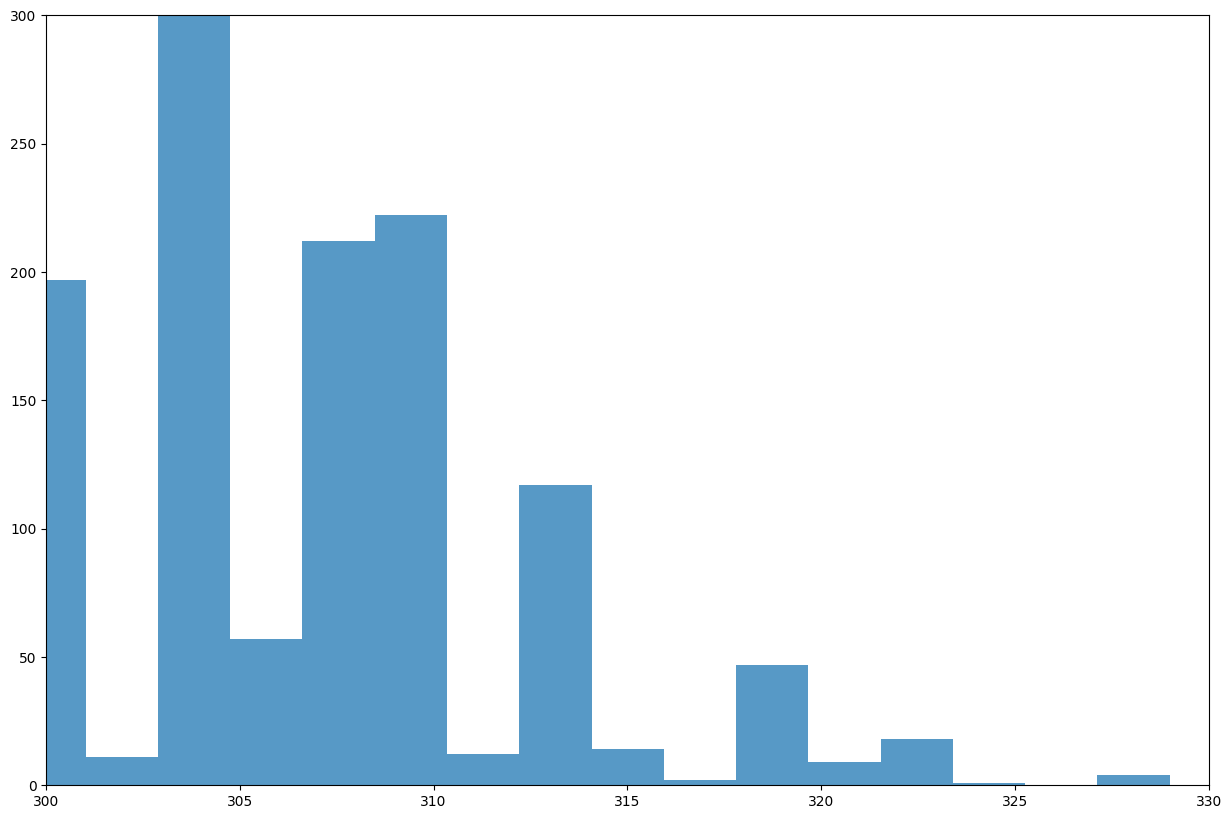

In [8]:
plt.figure(figsize=(15, 10))
plt.hist(temp_as_floats, 200, density=False, alpha=0.75, histtype="stepfilled")
plt.xlim(300, 330)
plt.ylim(0, 300)
plt.show()

---

## Filtering

#### In the following section the bmrd ids with a corresponding temperature value of one will be filtered and saved in a list.

In [9]:
keys = list(updated_measurement_conditions)

In [10]:
filtered_by_temp = [keys[index] for index, p in enumerate(temp_as_floats) if p >= 273 and p <= 313]

In [11]:
len(filtered_by_temp)

5687

In [12]:
filtered_by_temp[:10]

['10002',
 '10006',
 '10008',
 '10009',
 '10011',
 '10012',
 '10013',
 '10019',
 '10024',
 '10025']

In [13]:
with open("Thesis_filtered_by_temperature.txt", "w") as outfile:
    outfile.writelines(",".join(map(str,filtered_by_temp)))